# Aprendizaje automatico con KNN

Ignoramos las posibles advertencias dado que suelen ser extensas y dificultan la legibilidad del contenido

In [1]:
import warnings
warnings.filterwarnings('ignore')

Importamos las librerias necesarias, en este caso vamos a utilizar sklearn para importar el algoritmo de aprendizaje, numpy para manejar operaciones, pandas para manipular el dataset y pyplot para visualizar datos

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Se ha elegido un dataset desde sklearn, cargamos y observamos los datos

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.target.shape

(150,)

In [10]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

Se ha verificado que cada fila representa una muestra con sus respectivas caracteristicas, no hace falta tratar los datos

importamos el metodo para separar los datos en entrenamiento y test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(iris.data, iris.target, random_state=14)

In [14]:
print(f'x entrenamiento: {xtrain.shape}')
print(f'y entrenamiento: {ytrain.shape}')
print(f'x test: {xtest.shape}')
print(f'y test: {ytest.shape}')

x entrenamiento: (112, 4)
y entrenamiento: (112,)
x test: (38, 4)
y test: (38,)


instanciamos el modelo con los siguientes ajustes:
vecinos = 3
distribucion de pesos = uniforme
algoritmo = auto (para que elija el mas apropiado en base a los datos que le damos)
p = 2 (para trabajar con distancia euclidiana)
metrica = minkowski


In [8]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto', p=2)

In [9]:
knn.fit(X=xtrain, y=ytrain)

KNeighborsClassifier(n_neighbors=3)

hacemos predicciones

In [10]:
y_predichas = knn.predict(xtest)

comparamos las Y

In [11]:
print(f'''y' : y''')
for i in range(len(y_predichas)):
    print(f'{y_predichas[i]} : {ytest[i]}')

y' : y
0 : 0
0 : 0
0 : 0
1 : 1
2 : 2
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
1 : 2
0 : 0
2 : 2
2 : 2
0 : 0
1 : 1
0 : 0
2 : 2
2 : 2
1 : 1
0 : 0
0 : 0
0 : 0
1 : 1
0 : 0
2 : 2
0 : 0
1 : 1
1 : 1
0 : 0
0 : 0
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
2 : 2
1 : 1


obtenemos la precision del modelo entrenado

In [12]:
knn.score(xtest, ytest)

0.9736842105263158

importamos el metodo para o=generar una matriz de confusion

In [13]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=ytest, y_pred=y_predichas)

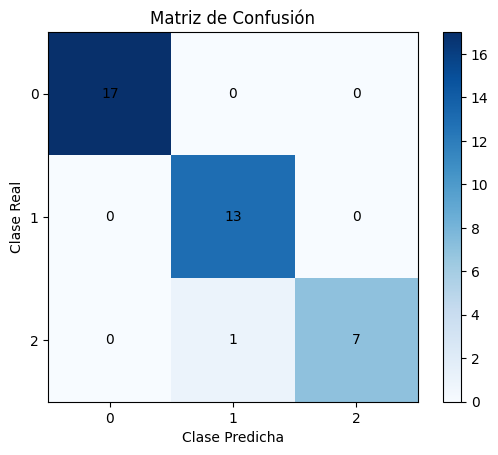

In [14]:
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()  # Agregar una barra de color para indicar la escala
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center')
tick_marks = np.arange(len(confusion))
plt.xticks(tick_marks)
plt.yticks(tick_marks)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()